مرحبا بكم في نشاطنا الثاني!


في هذا التدريب سنحمّل مدونة أخرى ثم سنجري بعض الإحصاءات الوصفية لإيجاد البيانات التي نستهدفها. فلنبدأ بتحميل متطلبات العمل في هذه البيئة.

In [1]:
from text_analytics import TextAnalytics
import os
import pandas as pd

ai = TextAnalytics()
ai.data_dir = os.path.join("..", "data")
print("Done!")

Done!


والآن نحمل مدونة أخرى. وفي هذا المرة سيكون عملنا على كتب من القرن التاسع عشر مهداة من مشروع قوتنبيرق. واسم الملف هو "stylistics.authorship_1800.gz"، ويتضمن كتبا منقحة ومجزّأة إلى أجزاء قصيرة (تقريبا فصول). وتضم هذه المدونة فقط المؤلفين الذين ألفوا عددا من الكتب. وسنستعمل كتبهم لاحقا في تحليل المؤلف والأسلوب.


In [2]:
file = os.path.join(ai.data_dir, "stylistics.authorship_1800.gz")
df = pd.read_csv(file)
print(df)
print("\nDone!")

        Author                        Title  \
0      alger_h           adrift_in_new_york   
1      alger_h           adrift_in_new_york   
2      alger_h           adrift_in_new_york   
3      alger_h           adrift_in_new_york   
4      alger_h           adrift_in_new_york   
...        ...                          ...   
25535  yonge_c  young_folks_history_of_rome   
25536  yonge_c  young_folks_history_of_rome   
25537  yonge_c  young_folks_history_of_rome   
25538  yonge_c  young_folks_history_of_rome   
25539  yonge_c  young_folks_history_of_rome   

                                                    Text  
0      note project gutenberg also has an html versio...  
1      after a brief pause florence seated herself at...  
2      turned and fixed a last sad look on the house ...  
3      attired young lady seated on the sofa yes leig...  
4      a cousin that will like you too a young girl n...  
...                                                  ...  
25535  free from all s

سنكشف الآن عن عدد العينات التي تتضمنها المدونة لمختلف المؤلفين. فالكود البرمجي أدناه يظهر لنا عدد الصفوف التي تخص كل مؤلف من مؤلفينا في هذا الجدول. وتتساوى كل الصفوف في حجم البيانات (5 آلاف كلمة). وهذا يعد مؤشرا نسبيا للإسهامات الفردية في التأليف الخاصة بكل مؤلف. والجدير بالذكر أننا لم نعالج المدونة معالجة قبلية عميقة (بعض الكتب تحتوي على صيغة نص كتابية مكررة boilerplate من مشروع قوتنبيرق). وأحد توجهاتنا التي ستظهر في الأنشطة الآتية هي أن بذل الجهد في إزالة ما لا ينتمي للنص من أجزاء قليلة لا يغير في واقع نتائجنا شيئا.


In [3]:
frequencies = ai.print_labels(df, "Author")
for author in frequencies:
    print(author, frequencies[author])
    
print("\nDone!")

alger_h 925
ballantyne_r 1120
baring-gould_s 982
darwin_c 858
dickens_c 1273
ebers_g 975
henty_g 2141
howells_w 809
james_h 830
kingston_w 1983
lever_c 1232
lytton_e 765
macdonald_g 1066
marryat_f 850
meredith_g 491
motley_j 335
oliphant_m 1322
reid_m 1016
stevenson_r 1088
sue_e 657
thackeray_w 771
trollope_a 1971
twain_m 696
yonge_c 1384

Done!


والآن كل *عينة* هي عبارة عن جزء بحجم الفصل يبلغ حوالي 5 آلاف كلمة. إذن هؤلاء المؤلفون كتبوا عددا من الكتب وكل كتاب يضم مجموعة من العينات. ولنمثل ذلك الآن بيانيا في شكل من الأشكال. الخطوة الأولى أن ننشئ إطارا للبيانات يضم كل التكرارات. ولعمل ذلك شغل الكود الآتي.


In [4]:
counts = pd.DataFrame.from_dict(frequencies, orient = "index", columns = ["Frequency"])
print(counts)
print("Done!")

                Frequency
alger_h               925
ballantyne_r         1120
baring-gould_s        982
darwin_c              858
dickens_c            1273
ebers_g               975
henty_g              2141
howells_w             809
james_h               830
kingston_w           1983
lever_c              1232
lytton_e              765
macdonald_g          1066
marryat_f             850
meredith_g            491
motley_j              335
oliphant_m           1322
reid_m               1016
stevenson_r          1088
sue_e                 657
thackeray_w           771
trollope_a           1971
twain_m               696
yonge_c              1384
Done!


ونحن نستعمل الآن دالة الرسم البياني من *مكتبة البانداز  pandas*


<AxesSubplot:>

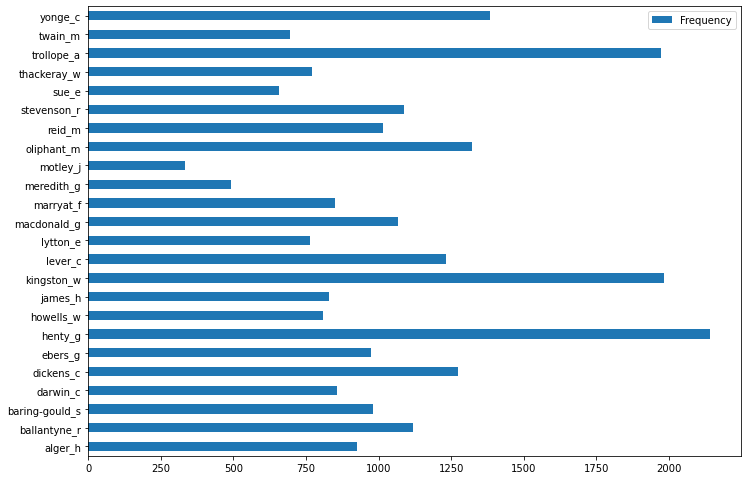

In [5]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

counts.plot(kind = "barh")

هذا كل شيء! لقد عرضنا بيانات أخرى، واستخلصنا بعض المعلومات الأساسية منها، ومثلناها برسم بياني بسيط يكشف لنا المؤلف الأكثر إنتاجا. والآن حان دورك. 

حاول استعمال الكود أعلاه لاستكشاف مدونة مختلفة:

    "stylistics.authorship_1850.gz"